In [529]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [530]:
df = pd.read_csv('titanic-passengers.csv',sep = ';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [531]:
df["Survived"].dropna(axis=0,how="any",inplace=True)
df["Age"].dropna(axis=0,how="any",inplace=True)
df["Sex"].dropna(axis=0,how="any",inplace=True)
df["Name"].dropna(axis=0,how="any",inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [532]:
print(df['Survived'].head().isnull().sum())
print(df['Age'].head().isnull().sum())
print(df['Sex'].head().isnull().sum())

0
0
0


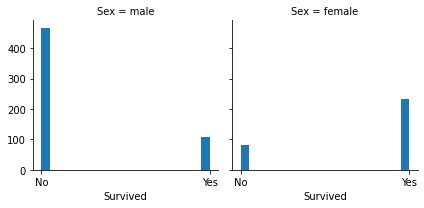

In [533]:

g = sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Survived',bins=20)

577
314


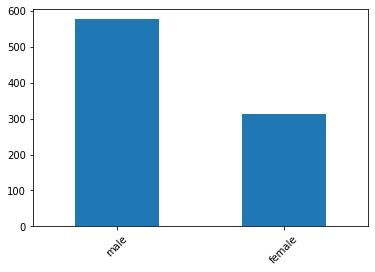

In [534]:
g = df['Sex'].value_counts()
g.plot.bar(rot=45)
nb_male = g.male
nb_female = g.female
print(nb_male)
print(nb_female)

In [535]:
df[["Sex","Survived","PassengerId"]].groupby(["Survived","Sex"]).count()

PassengerId
Survived Sex                
No       female           81
         male            468
Yes      female          233
         male            109

# male /  survived = yes  

In [536]:
df_male_survived_y = df.copy()
print(df_male_survived_y.shape)

(891, 12)


In [537]:
df_male_survived_y["Survived"].dropna(axis=0,how="any",inplace=True)
df_male_survived_y["Age"].dropna(axis=0,how="any",inplace=True)
df_male_survived_y["Sex"].dropna(axis=0,how="any",inplace=True)

In [538]:
print(df_male_survived_y['Survived'].head().isnull().sum())
print(df_male_survived_y['Age'].head().isnull().sum())
print(df_male_survived_y['Sex'].head().isnull().sum())

0
0
0


In [539]:
df_male_survived_y.drop(df_male_survived_y[df_male_survived_y['Survived'] == "No"].index, inplace = True)
print(df_male_survived_y.shape)

(342, 12)


In [540]:
df_male_survived_y.drop(df_male_survived_y[df_male_survived_y['Sex'] == "female"].index, inplace = True)
print(df_male_survived_y.shape)

(109, 12)


In [541]:
df_male_survived_y.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.00,1,0,19943,90.0000,C93,S
22,544,Yes,2,"Beane, Mr. Edward",male,32.00,1,0,2908,26.0000,NaN,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.00,1,1,13567,79.2000,B41,C
27,661,Yes,1,"Frauenthal, Dr. Henry William",male,50.00,2,0,PC 17611,133.6500,NaN,S
37,431,Yes,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.00,0,0,110564,26.5500,C52,S
52,445,Yes,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
53,839,Yes,3,"Chip, Mr. Chang",male,32.00,0,0,1601,56.4958,NaN,S
54,75,Yes,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
72,608,Yes,1,"Daniel, Mr. Robert Williams",male,27.00,0,0,113804,30.5000,NaN,S
82,756,Yes,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


<AxesSubplot:title={'center':'hisogram of males that survived with ages'}, xlabel='age', ylabel='Frequency'>

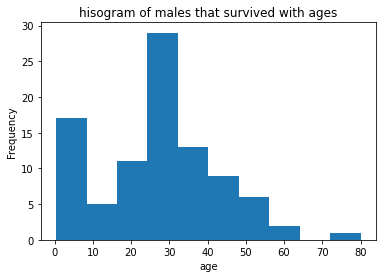

In [542]:
plt.title('hisogram of males that survived with ages')
plt.xlabel('age')
df_male_survived_y['Age'].plot.hist()

# male /  survived = no  

In [543]:
df_male_survived_n = df.copy()
print(df_male_survived_n.shape)

(891, 12)


In [544]:
df_male_survived_n["Survived"].dropna(axis=0,how="any",inplace=True)
df_male_survived_n["Age"].dropna(axis=0,how="any",inplace=True)
df_male_survived_n["Sex"].dropna(axis=0,how="any",inplace=True)

In [545]:
print(df_male_survived_n['Survived'].head().isnull().sum())
print(df_male_survived_n['Age'].head().isnull().sum())
print(df_male_survived_n['Sex'].head().isnull().sum())

0
0
0


In [546]:
df_male_survived_n.drop(df_male_survived_n[df_male_survived_n['Survived'] == "Yes"].index, inplace = True)
print(df_male_survived_n.shape)

(549, 12)


In [547]:
df_male_survived_n.drop(df_male_survived_n[df_male_survived_n['Sex'] == "female"].index, inplace = True)
print(df_male_survived_n.shape)

(468, 12)


In [548]:
df_male_survived_n.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
10,135,No,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
13,595,No,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,NaN,S
14,127,No,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q


<AxesSubplot:title={'center':"hisogram of males that doesen't survived with ages"}, xlabel='age', ylabel='Frequency'>

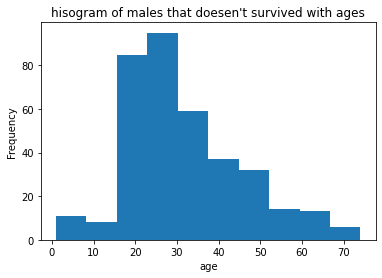

In [549]:
plt.title("hisogram of males that doesen't survived with ages")
plt.xlabel('age')
df_male_survived_n['Age'].plot.hist()

# females / survived = yes

In [550]:
df_female_survived_y = df.copy()
print(df_female_survived_y.shape)

(891, 12)


In [551]:
df_female_survived_y["Survived"].dropna(axis=0,how="any",inplace=True)
df_female_survived_y["Age"].dropna(axis=0,how="any",inplace=True)
df_female_survived_y["Sex"].dropna(axis=0,how="any",inplace=True)

In [552]:
print(df_female_survived_y['Survived'].head().isnull().sum())
print(df_female_survived_y['Age'].head().isnull().sum())
print(df_female_survived_y['Sex'].head().isnull().sum())

0
0
0


In [553]:
df_female_survived_y.drop(df_female_survived_y[df_female_survived_y['Survived'] == "Yes"].index, inplace = True)
print(df_female_survived_y.shape)

(549, 12)


In [554]:
df_female_survived_y.drop(df_female_survived_y[df_female_survived_y['Sex'] == "male"].index, inplace = True)
print(df_female_survived_y.shape)

(81, 12)


In [555]:
df_female_survived_y.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
11,294,No,3,"Haas, Miss. Aloisia",female,24.0,0,0,349236,8.8500,NaN,S
29,115,No,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
43,72,No,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
61,639,No,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
65,397,No,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
70,618,No,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",female,26.0,1,0,A/5. 3336,16.1000,NaN,S
80,565,No,3,"Meanwell, Miss. (Marion Ogden)",female,NaN,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
81,416,No,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
93,50,No,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S


<AxesSubplot:title={'center':'hisogram of females that survived with ages'}, xlabel='age', ylabel='Frequency'>

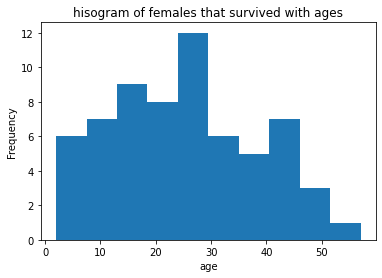

In [556]:
plt.title("hisogram of females that survived with ages")
plt.xlabel('age')
df_female_survived_y['Age'].plot.hist()

# females / survived = no

In [557]:
df_female_survived_n = df.copy()
print(df_female_survived_n.shape)

(891, 12)


In [558]:
df_female_survived_n["Survived"].dropna(axis=0,how="any",inplace=True)
df_female_survived_n["Age"].dropna(axis=0,how="any",inplace=True)
df_female_survived_n["Sex"].dropna(axis=0,how="any",inplace=True)

In [559]:
print(df_female_survived_n['Survived'].head().isnull().sum())
print(df_female_survived_n['Age'].head().isnull().sum())
print(df_female_survived_n['Sex'].head().isnull().sum())

0
0
0


In [560]:
df_female_survived_n.drop(df_female_survived_n[df_female_survived_n['Survived'] == "No"].index, inplace = True)
print(df_female_survived_n.shape)

(342, 12)


In [561]:
df_female_survived_n.drop(df_female_survived_n[df_female_survived_n['Sex'] == "male"].index, inplace = True)
print(df_female_survived_n.shape)

(233, 12)


In [562]:
df_female_survived_n.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S
12,755,Yes,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0000,NaN,S
20,83,Yes,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
24,273,Yes,2,"Mellinger, Mrs. (Elizabeth Anne Maidment)",female,41.0,0,1,250644,19.5000,NaN,S
34,727,Yes,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
39,44,Yes,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
40,347,Yes,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S
45,307,Yes,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
60,152,Yes,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S


<AxesSubplot:title={'center':'hisogram of females that survived with ages'}, xlabel='age', ylabel='Frequency'>

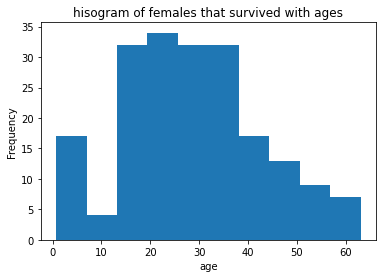

In [563]:
plt.title("hisogram of females that survived with ages")
plt.xlabel('age')
df_female_survived_n['Age'].plot.hist()

# Studing if the Pclass and Embarked affect the result

In [564]:
df_Pclass = df.copy()
print(df_Pclass.shape)

(891, 12)


In [565]:
df_Pclass["Pclass"].dropna(axis=0,how="any",inplace=True)
df_Pclass["Survived"].dropna(axis=0,how="any",inplace=True)

In [566]:
df_Pclass.drop(df_Pclass[df_Pclass['Pclass'] == 2].index, inplace = True)
df_Pclass.drop(df_Pclass[df_Pclass['Pclass'] == 3].index, inplace = True)
df_Pclass.drop(df_Pclass[df_Pclass['Survived'] == "No"].index, inplace = True)
print(df_Pclass.shape)

(136, 12)


<AxesSubplot:title={'center':'Pclass = 1'}, xlabel='age', ylabel='Frequency'>

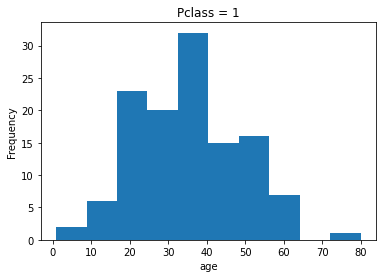

In [567]:
plt.title("Pclass = 1")
plt.xlabel('age')
df_Pclass['Age'].plot.hist()

In [568]:
df_Pclass2 = df.copy()
print(df_Pclass2.shape)

(891, 12)


In [569]:
df_Pclass2["Pclass"].dropna(axis=0,how="any",inplace=True)
df_Pclass2["Survived"].dropna(axis=0,how="any",inplace=True)

In [570]:
df_Pclass2.drop(df_Pclass2[df_Pclass2['Pclass'] == 1].index, inplace = True)
df_Pclass2.drop(df_Pclass2[df_Pclass2['Pclass'] == 3].index, inplace = True)
df_Pclass2.drop(df_Pclass2[df_Pclass2['Survived'] == "No"].index, inplace = True)
print(df_Pclass2.shape)

(87, 12)


<AxesSubplot:title={'center':'Pclass = 2'}, xlabel='age', ylabel='Frequency'>

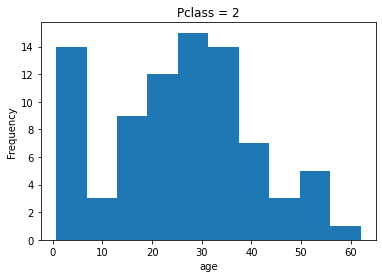

In [571]:
plt.title("Pclass = 2")
plt.xlabel('age')
df_Pclass2['Age'].plot.hist()

In [572]:
df_Pclass3 = df.copy()
print(df_Pclass3.shape)

(891, 12)


In [573]:
df_Pclass3["Pclass"].dropna(axis=0,how="any",inplace=True)
df_Pclass3["Survived"].dropna(axis=0,how="any",inplace=True)

In [574]:
df_Pclass3.drop(df_Pclass3[df_Pclass3['Pclass'] == 1].index, inplace = True)
df_Pclass3.drop(df_Pclass3[df_Pclass3['Pclass'] == 2].index, inplace = True)
df_Pclass3.drop(df_Pclass3[df_Pclass3['Survived'] == "No"].index, inplace = True)
print(df_Pclass3.shape)

(119, 12)


<AxesSubplot:title={'center':'Pclass = 3'}, xlabel='age', ylabel='Frequency'>

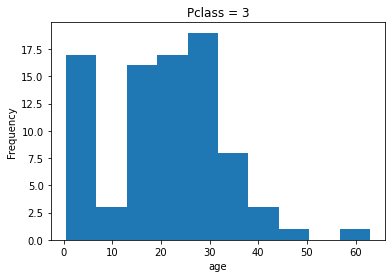

In [575]:
plt.title("Pclass = 3")
plt.xlabel('age')
df_Pclass3['Age'].plot.hist()

In [576]:
print(df_Pclass.shape[0])
print(df_Pclass2.shape[0])
print(df_Pclass3.shape[0])

136
87
119


# -------------------------------------------------------

In [577]:
df_emb = df.copy()
print(df_emb.shape)

(891, 12)


In [578]:
df_emb["Embarked"].dropna(axis=0,how="any",inplace=True)
df_emb["Survived"].dropna(axis=0,how="any",inplace=True)

In [579]:
df_emb.drop(df_emb[df_emb['Embarked'] == "C"].index, inplace = True)
df_emb.drop(df_emb[df_emb['Embarked'] == "S"].index, inplace = True)
df_emb.drop(df_emb[df_emb['Survived'] == "No"].index, inplace = True)
print(df_emb.shape)

(32, 12)


<AxesSubplot:title={'center':'Q'}, xlabel='age', ylabel='Frequency'>

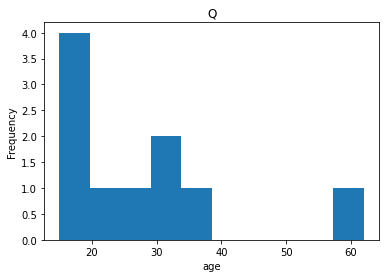

In [580]:
plt.title("Q")
plt.xlabel('age')
df_emb['Age'].plot.hist()

In [581]:
df_emb2 = df.copy()
print(df_emb2.shape)

(891, 12)


In [582]:
df_emb2["Embarked"].dropna(axis=0,how="any",inplace=True)
df_emb2["Survived"].dropna(axis=0,how="any",inplace=True)

In [583]:
df_emb2.drop(df_emb2[df_emb2['Embarked'] == "Q"].index, inplace = True)
df_emb2.drop(df_emb2[df_emb2['Embarked'] == "S"].index, inplace = True)
df_emb2.drop(df_emb2[df_emb2['Survived'] == "No"].index, inplace = True)
print(df_emb2.shape)

(95, 12)


<AxesSubplot:title={'center':'C'}, xlabel='age', ylabel='Frequency'>

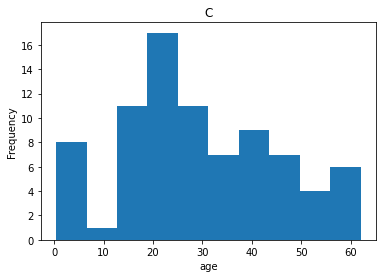

In [584]:
plt.title("C")
plt.xlabel('age')
df_emb2['Age'].plot.hist()

In [585]:
df_emb3 = df.copy()
print(df_emb3.shape)

(891, 12)


In [586]:
df_emb3["Embarked"].dropna(axis=0,how="any",inplace=True)
df_emb3["Survived"].dropna(axis=0,how="any",inplace=True)

In [587]:
df_emb3.drop(df_emb3[df_emb3['Embarked'] == "Q"].index, inplace = True)
df_emb3.drop(df_emb3[df_emb3['Embarked'] == "C"].index, inplace = True)
df_emb3.drop(df_emb3[df_emb3['Survived'] == "No"].index, inplace = True)
print(df_emb3.shape)

(219, 12)


<AxesSubplot:title={'center':'S'}, xlabel='age', ylabel='Frequency'>

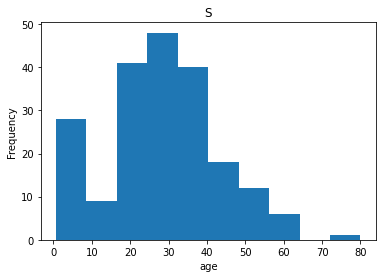

In [588]:
plt.title("S")
plt.xlabel('age')
df_emb3['Age'].plot.hist()

In [589]:
print(df_emb.shape[0])
print(df_emb2.shape[0])
print(df_emb3.shape[0])

32
95
219


In [590]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

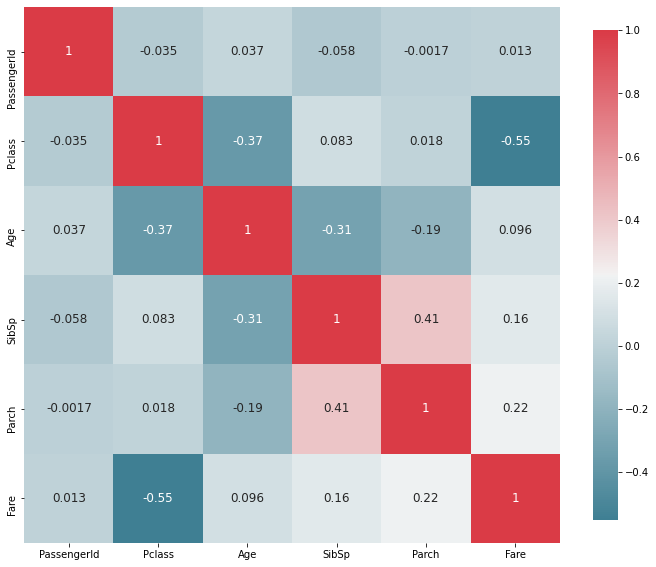

In [591]:
plot_correlation_map( df )

In [592]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

}


In [593]:
print(df['Name'][4])

def getindex(txt,i):
    for j in range(len(txt)):
        if txt[j] == i:
            return j
    return -1

def clean(txt):
    newtxt =''
    for i in range(len(txt)):
        if txt[i] != " ":
            newtxt += txt[i]
    return newtxt
T = []
for i in range(len(df['Name'])):
    start = getindex(df['Name'][i],',')
    end = getindex(df['Name'][i],'.')
    txt = df['Name'][i][start+1:end]
    txt = clean(txt)
    T.append(txt)
print(T)

Davidson, Mr. Thornton
['Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Dr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Major', 'Mrs', 'Don', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Master', 'Dr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Master', 'Miss', 'Mr', 'Rev', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Mrs', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Col', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr

In [600]:
T2 =[]
print(len(T))
for i in range(len(T)):
    for k, v in Title_Dictionary.items():
        if T[i] == k :
            T2.append(v)
print(len(T),"/",len(T2))
T2.append('Miss')

891
891 / 890


In [595]:
print(df['Name'].shape)

(891,)


In [601]:
df["Title"] = T2

In [602]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mrs
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mrs
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs
